In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(100000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [3]:
energies[0:10]

array([-8.,  4.,  0., 12.,  0.,  0., -4.,  0.,  0.,  0.])

In [4]:
statesold=states

In [5]:
# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
statesold2=states
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]

In [6]:
len(Data[0])

100000

In [7]:
%matplotlib inline

def errores(n,lmbda):
    # define error lists
    train_errors_leastsq = []
    test_errors_leastsq = []

    train_errors_ridge = []
    test_errors_ridge = []

    train_errors_lasso = []
    test_errors_lasso = []


    # define number of samples
    n_samples=n
    # define train and test data sets
    X_train=Data[0][:n_samples]
    Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
    X_test=Data[0][n_samples:3*n_samples//2]
    Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])
    # set up Lasso and Ridge Regression models
    leastsq=linear_model.LinearRegression()
    ridge=linear_model.Ridge()
    lasso = linear_model.Lasso()
    #Initialize coeffficients for ridge regression and Lasso
    coefs_leastsq = []
    coefs_ridge = []
    coefs_lasso=[]

        
    ### ordinary least squares
    leastsq.fit(X_train, Y_train) # fit model 
    coefs_leastsq.append(leastsq.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_leastsq.append(leastsq.score(X_train, Y_train))
    test_errors_leastsq.append(leastsq.score(X_test,Y_test))

    ### apply Ridge regression
    ridge.set_params(alpha=lmbda) # set regularisation parameter
    ridge.fit(X_train, Y_train) # fit model 
    coefs_ridge.append(ridge.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, Y_train))
    test_errors_ridge.append(ridge.score(X_test,Y_test))

    ### apply Ridge regression
    lasso.set_params(alpha=lmbda) # set regularisation parameter
    lasso.fit(X_train, Y_train) # fit model
    coefs_lasso.append(lasso.coef_) # store weights
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(lasso.score(X_train, Y_train))
    test_errors_lasso.append(lasso.score(X_test,Y_test))

    return train_errors_leastsq, test_errors_leastsq,train_errors_ridge, test_errors_ridge, train_errors_lasso, test_errors_lasso


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.814e-01, tolerance: 3.107e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.150e+00, tolerance: 1.787e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.423e+00, toler

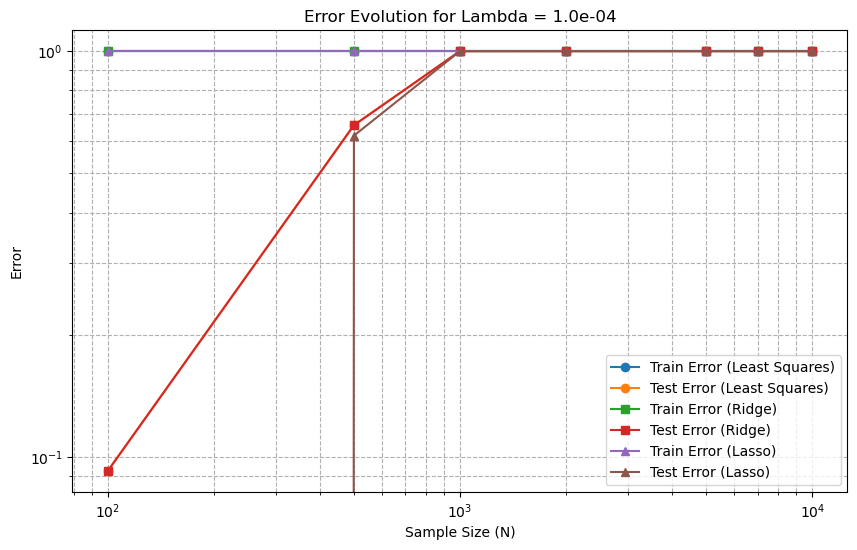

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.679e-01, tolerance: 3.107e-01
  model = cd_fast.enet_coordinate_descent(


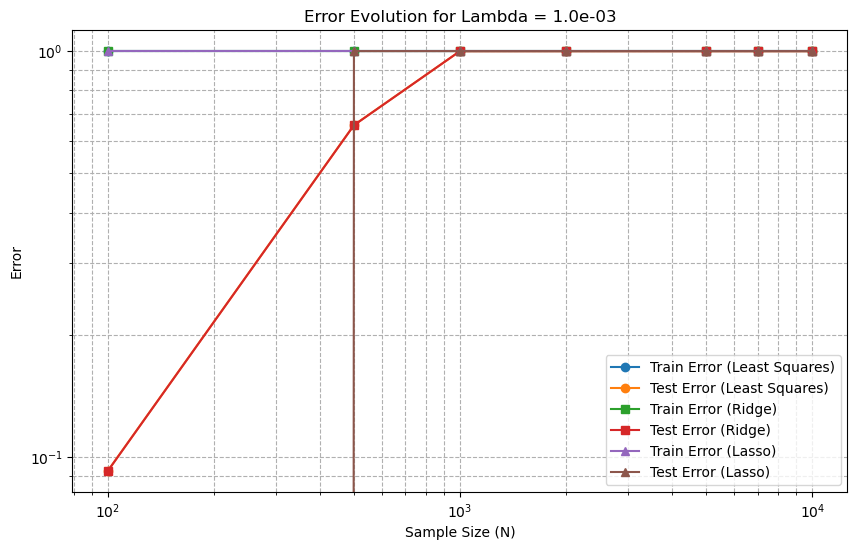

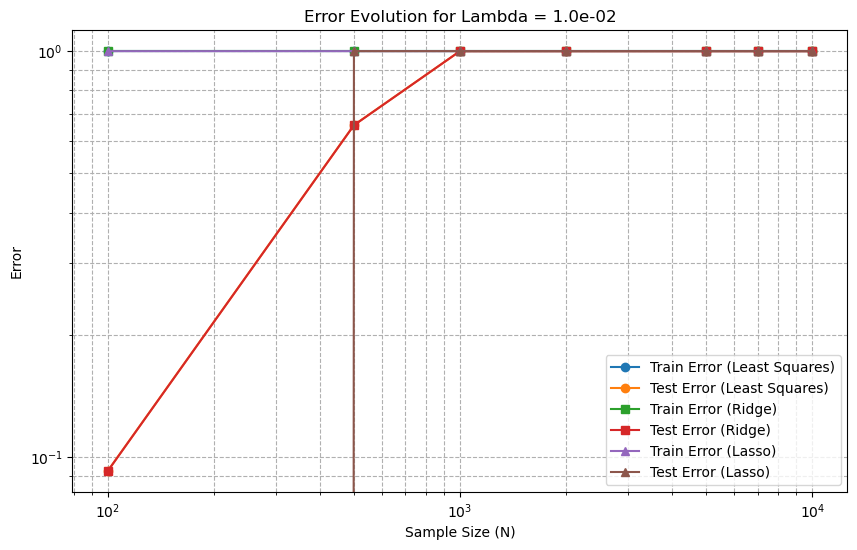

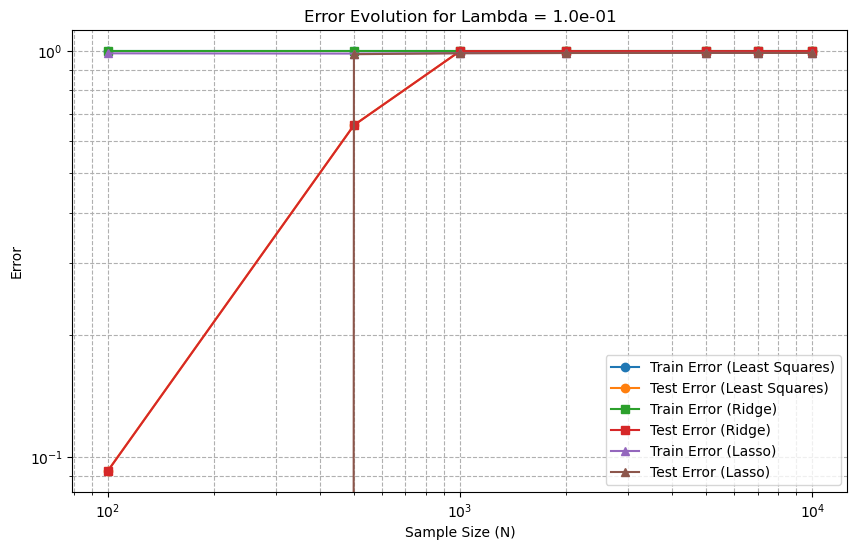

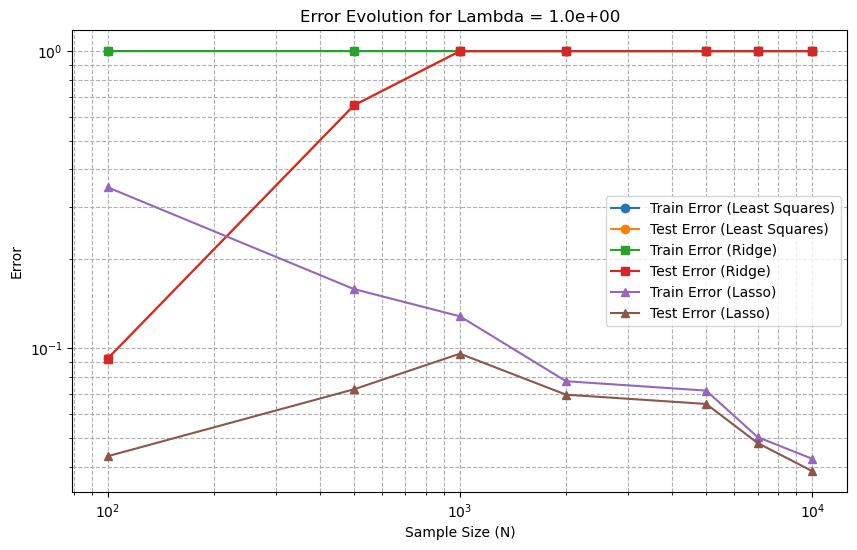

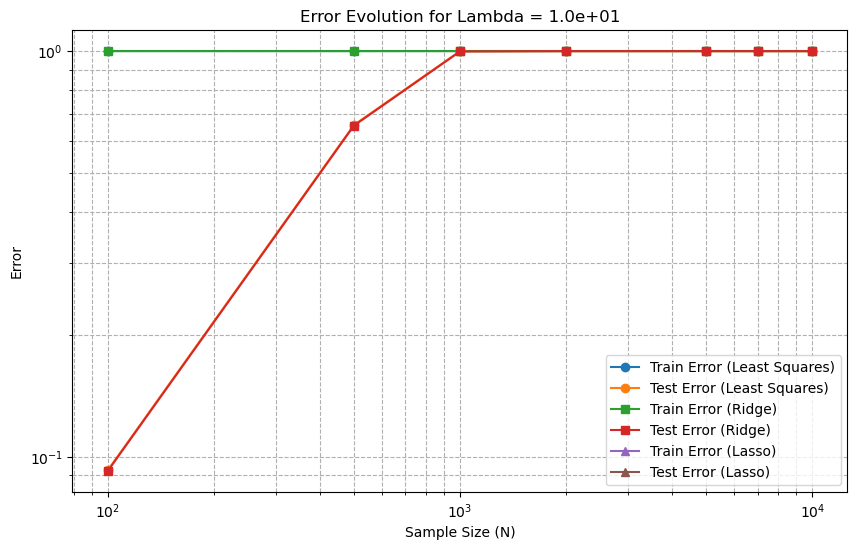

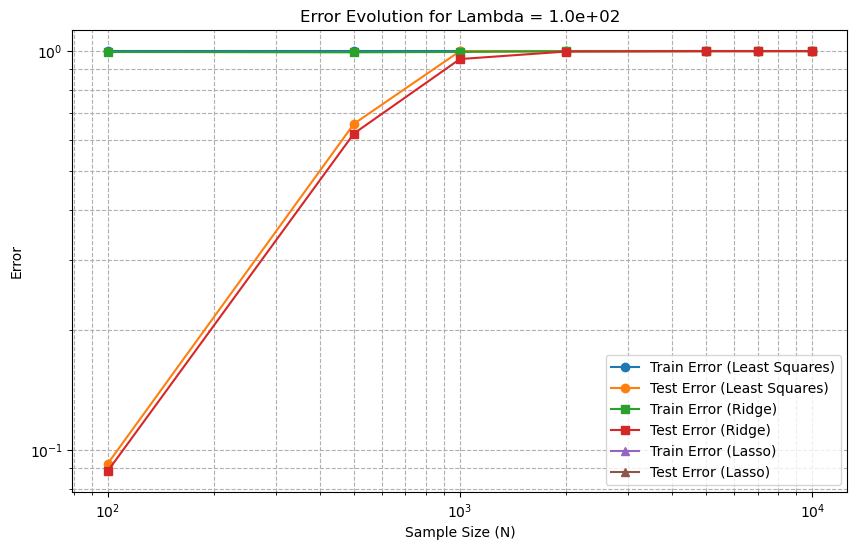

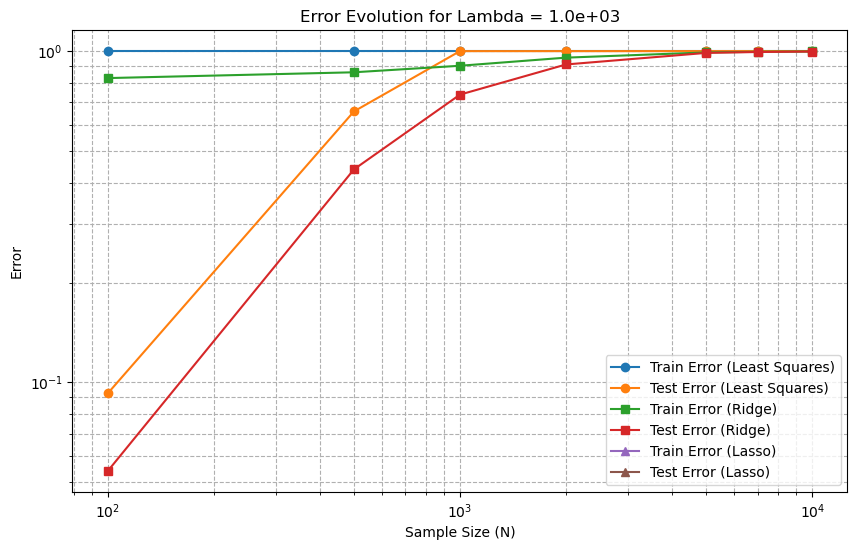

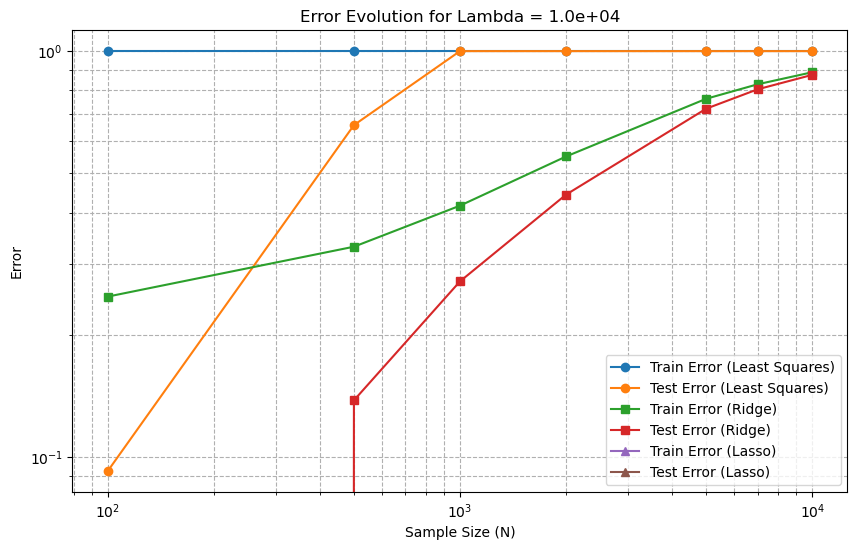

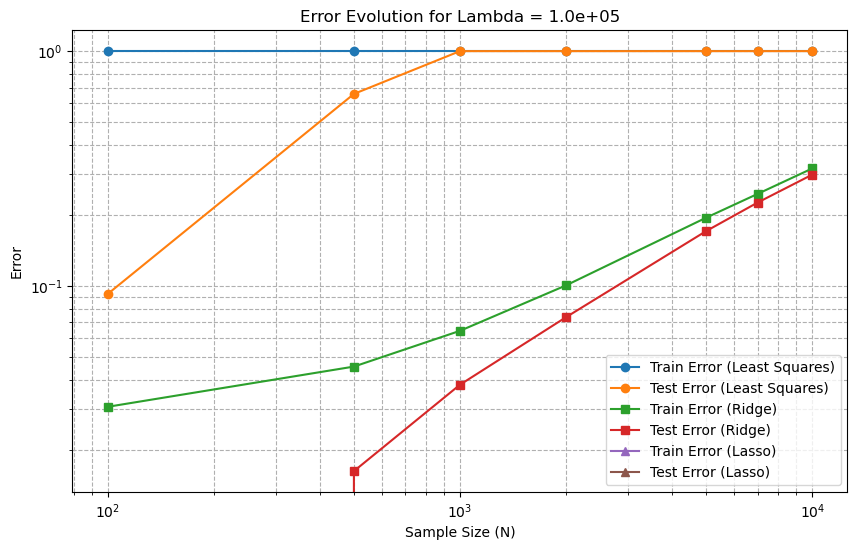

In [8]:
N = [100,500,1000,2000,5000,7000,10000]
lambdas = np.logspace(-4, 5, 10)

# Loop over lambdas and collect errors for each N
for lmbda in lambdas:
    train_errors_leastsq = []
    test_errors_leastsq = []
    train_errors_ridge = []
    test_errors_ridge = []
    train_errors_lasso = []
    test_errors_lasso = []

    for n in N:
        train_leastsq, test_leastsq, train_ridge, test_ridge, train_lasso, test_lasso = errores(n, lmbda)
        
        # Append errors for each model and dataset size
        train_errors_leastsq.append(train_leastsq)
        test_errors_leastsq.append(test_leastsq)
        train_errors_ridge.append(train_ridge)
        test_errors_ridge.append(test_ridge)
        train_errors_lasso.append(train_lasso)
        test_errors_lasso.append(test_lasso)

    # Plot for each lambda
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_errors_leastsq, label="Train Error (Least Squares)", marker='o')
    plt.plot(N, test_errors_leastsq, label="Test Error (Least Squares)", marker='o')
    plt.plot(N, train_errors_ridge, label="Train Error (Ridge)", marker='s')
    plt.plot(N, test_errors_ridge, label="Test Error (Ridge)", marker='s')
    plt.plot(N, train_errors_lasso, label="Train Error (Lasso)", marker='^')
    plt.plot(N, test_errors_lasso, label="Test Error (Lasso)", marker='^')

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Sample Size (N)")
    plt.ylabel("Error")
    plt.title(f"Error Evolution for Lambda = {lmbda:.1e}")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
